

# **Libraries**

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Machine Learning
import statsmodels.api as sm

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
#from dataprep.eda import create_report
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
pip install dataprep

In [ ]:
df = pd.read_csv('/content/master.csv')

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
create_report(df)

# **DataFrame observation**


Supervised [Classification / Regression] (or) Unsupervised [Clustering / Association]

Dependent column

Independent column

Continuous column

Category column

In [ ]:
len(df.country.unique())

101

In [ ]:
len(df.year.unique())

32

In [ ]:
df['generation'].unique()


array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [ ]:
df['year'] = df['year'].astype(int)
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(int)


In [ ]:
df.drop(['country-year'],axis=1,inplace = True)
df.drop(['HDI for year'], axis=1, inplace = True)
df.drop(['generation'], axis = 1, inplace = True)

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309


In [ ]:
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)'],
      dtype='object')


In [ ]:
# Dependent -
# Independent -

continuous_columns = ["population", "suicides/100k pop",'suicides_no',' gdp_for_year ($) ', "gdp_per_capita ($)"]
category_columns = ["country",	"year",	"age", "sex"]

#Unsupervised

# **Data cleaning using pandas**


Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
        oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )

  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "H0 is accepted"
          hypothesis_df[column_2][column_1] = "H0 is accepted"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "H0 is rejected"
            hypothesis_df[column_2][column_1] = "H0 is rejected"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "H0 is accepted"
                hypothesis_df[column_2][column_1] = "H0 is accepted"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "H0 is rejected"
                hypothesis_df[column_2][column_1] = "H0 is rejected"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "H0 is accepted"
            hypothesis_df[continuous_column][category_column] = "H0 is accepted"
        else:
            # H0 is rejected, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "H0 is rejected"
            hypothesis_df[continuous_column][category_column] = "H0 is rejected"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
df.corr()

<ipython-input-51-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.025240,0.001785
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,1.000000,0.303405
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.303405,1.000000


# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,population,suicides/100k pop,suicides_no,gdp_for_year ($),gdp_per_capita ($)
Population Mean,1844793.617398,12.816097,242.574407,445580969025.726624,16866.464414
Sample Means,{1838499.6500763842},{12.824665932782173},{240.11968457943922},{444195278410.4162},{16871.204654924513}
H0_accepted,2799,2846,2787,2815,2820
H0_rejected,2765,2718,2777,2749,2744
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


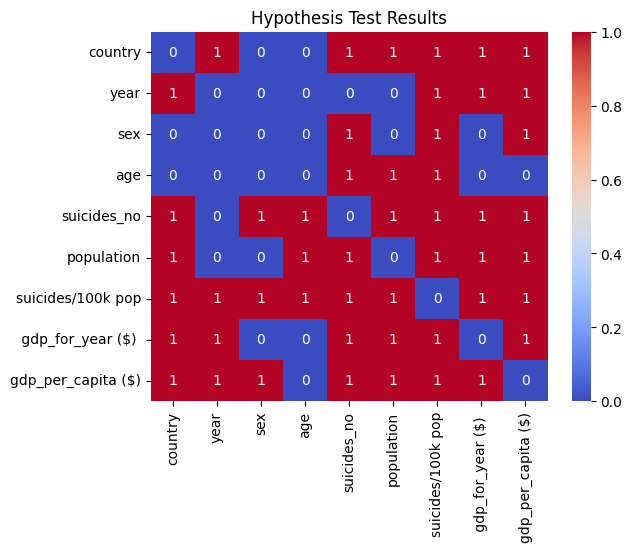

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'H0 is rejected', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'H0 is accepted': 1, 'H0 is rejected': 0}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-57-ebcbbf98ef30>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Preprocessing**

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796


In [ ]:
encode = OrdinalEncoder()
df['country'] = encode.fit_transform(df[['country']])
df['sex'] = encode.fit_transform(df[['sex']])
df['age'] = encode.fit_transform(df[['age']])

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796


# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

# **PreProcessing**

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309


In [ ]:
encode = OrdinalEncoder()
df['country'] = encode.fit_transform(df[['country']])
df['sex'] = encode.fit_transform(df[['sex']])
df['age'] = encode.fit_transform(df[['age']])


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,0.0,1987,1.0,0.0,21,312900,6.71,2156624900,796
1,0.0,1987,1.0,2.0,16,308000,5.19,2156624900,796
2,0.0,1987,0.0,0.0,14,289700,4.83,2156624900,796
3,0.0,1987,1.0,5.0,1,21800,4.59,2156624900,796
4,0.0,1987,1.0,1.0,9,274300,3.28,2156624900,796


# **Machine learning**

In [ ]:
wcss = []
for i in range(1,27820):
  model = KMeans(i)
  model.fit(df)
  wcss.append(model.inertia_)
print(wcss)

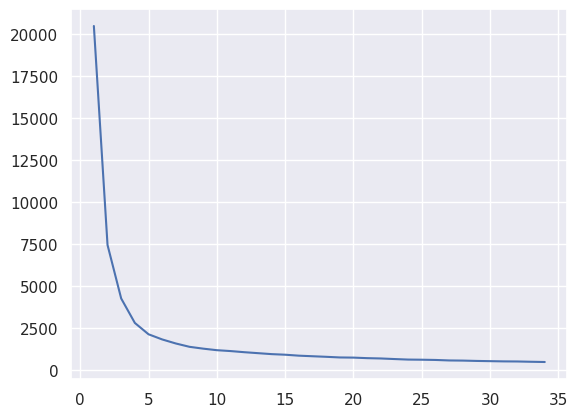

In [ ]:
plt.plot(range(1,35), wcss[0:34])
plt.show()

In [ ]:
result = KMeans(15).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
identify_cluster = result.fit_predict(df)
df['cluster'] = identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df.cluster.value_counts()

10    30
8     28
7     28
6     23
4     23
14    18
12    18
2     15
5     13
11    13
0     12
1      9
13     7
9      4
3      3
Name: cluster, dtype: int64

In [ ]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,0.0,1987,1.0,0.0,21,312900,6.71,2156624900,796
1,0.0,1987,1.0,2.0,16,308000,5.19,2156624900,796
2,0.0,1987,0.0,0.0,14,289700,4.83,2156624900,796
3,0.0,1987,1.0,5.0,1,21800,4.59,2156624900,796
4,0.0,1987,1.0,1.0,9,274300,3.28,2156624900,796
...,...,...,...,...,...,...,...,...,...
27815,100.0,2014,0.0,2.0,107,3620833,2.96,63067077179,2309
27816,100.0,2014,0.0,5.0,9,348465,2.58,63067077179,2309
27817,100.0,2014,1.0,3.0,60,2762158,2.17,63067077179,2309
27818,100.0,2014,0.0,3.0,44,2631600,1.67,63067077179,2309


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


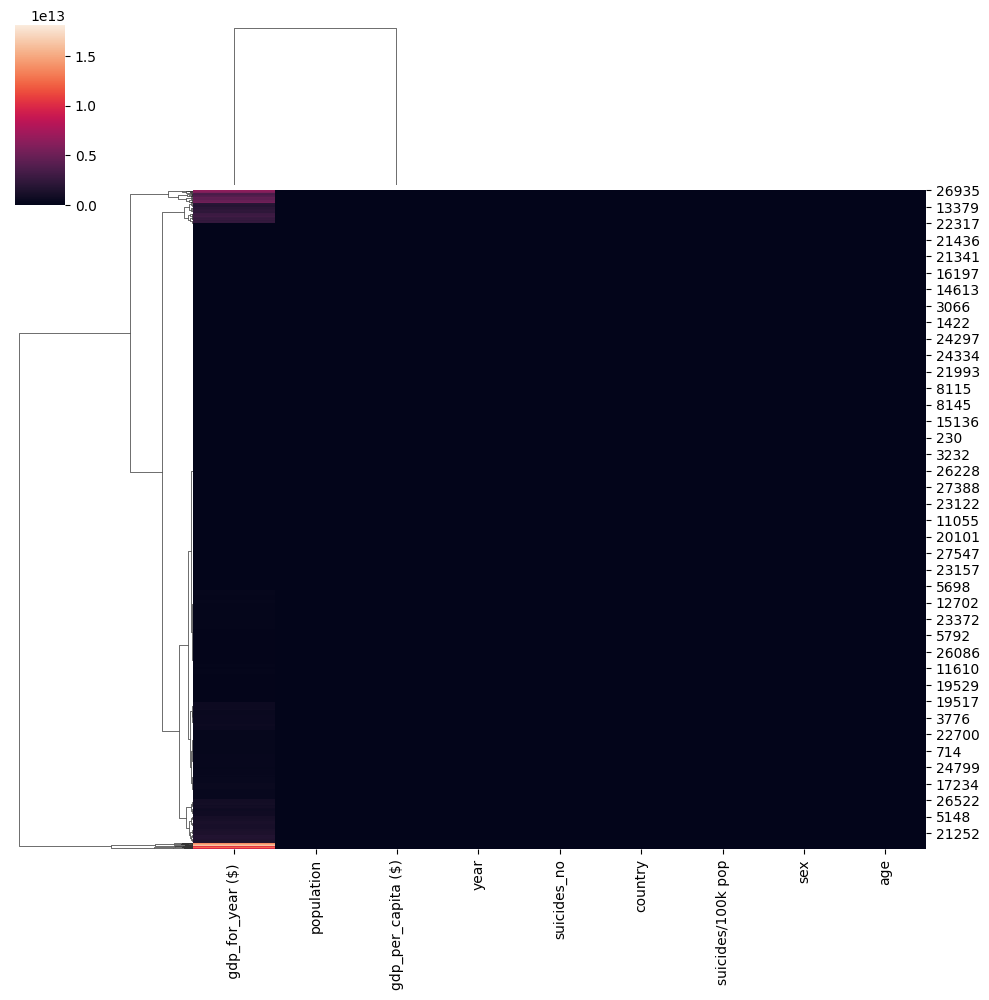

In [ ]:
sns.clustermap(df)


In [ ]:
df[df['cluster'] ==3]